In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
#car_id can be dropped not useful for analysis
df.drop('car_ID', axis=1, inplace=True) 
df.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength   ...     \
0  convertible        rwd          front       88.6      168.8   ...      
1  convertible        rwd          front       88.6      168.8   ...      
2    hatchback        rwd          front       94.5      171.2   ...      
3        sedan        fwd          front       99.8      176.6   ...      
4        sedan        4wd          front       99.4      176.6   ...      

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [5]:
df.shape()

(205, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [7]:
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [8]:
df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [9]:
#data undestanding , preparation EDA
#consider  column car name
df.CarName.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [10]:
#we are interested only in company names so extract it

#Extract  only the company name
tmp = df['CarName'].str.split(r'\s|-')
df['CarName'] = tmp.apply(lambda x: x[0])
df.CarName.head()

0    alfa
1    alfa
2    alfa
3    audi
4    audi
Name: CarName, dtype: object

In [11]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
#divide all the columns into numeric and categorical type
#Categorical
#'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation'
#'enginetype', 'cylindernumber','fuelsystem
#numeric
#'symboling', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize',
#'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'
#This  makes it easier to proceed with analysis
#now we can inspect  each categorical  variable  for data  descripancies
#Car  name
np.unique(df['CarName'].values)

array(['Nissan', 'alfa', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'volvo', 'vw'], dtype=object)

In [13]:
#As  you can see there are many spelling errors indicating  same company names like nissan, 'Nissan'
#porcshce  porsche  etc
#such issues has to be resolved
#we can do it using   replace

df['CarName'].replace(['nissan'], 'Nissan', inplace= True)
df['CarName'].replace(['porcshce'], 'porsche',inplace= True )
df['CarName'].replace(['toyouta'], 'toyota', inplace= True)
df['CarName'].replace(['vokswagen'], 'volkswagen', inplace= True)
df['CarName'].replace(['vw'], 'volkswagen', inplace= True)
df['CarName'].replace(['maxda'], 'mazda', inplace= True)
np.unique(df['CarName'].values)


array(['Nissan', 'alfa', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
np.unique(df['fueltype'].values)

array(['diesel', 'gas'], dtype=object)

In [15]:
np.unique(df['aspiration'].values)

array(['std', 'turbo'], dtype=object)

In [16]:
np.unique(df['doornumber'].values)

array(['four', 'two'], dtype=object)

In [17]:
np.unique(df['carbody'].values)

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)

In [18]:
np.unique(df['drivewheel'].values)

array(['4wd', 'fwd', 'rwd'], dtype=object)

In [19]:
np.unique(df['enginelocation'].values)

array(['front', 'rear'], dtype=object)

In [20]:
np.unique(df['enginetype'].values)

array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)

In [21]:
#as u can say  some  types are mispelled
#some values need to be replaced

#ohc-- overhead valve engine
#dohc--double overhead camshaft engine

df['enginetype'].replace(['dohcv'], 'dohc', inplace= True)
df['enginetype'].replace(['ohcf'], 'ohc', inplace= True)
df['enginetype'].replace(['ohcv'], 'ohc', inplace= True)
np.unique(df['enginetype'].values)

array(['dohc', 'l', 'ohc', 'rotor'], dtype=object)

In [22]:
np.unique(df['cylindernumber'].values)

array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object)

In [23]:
np.unique(df['fuelsystem'].values)

array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)

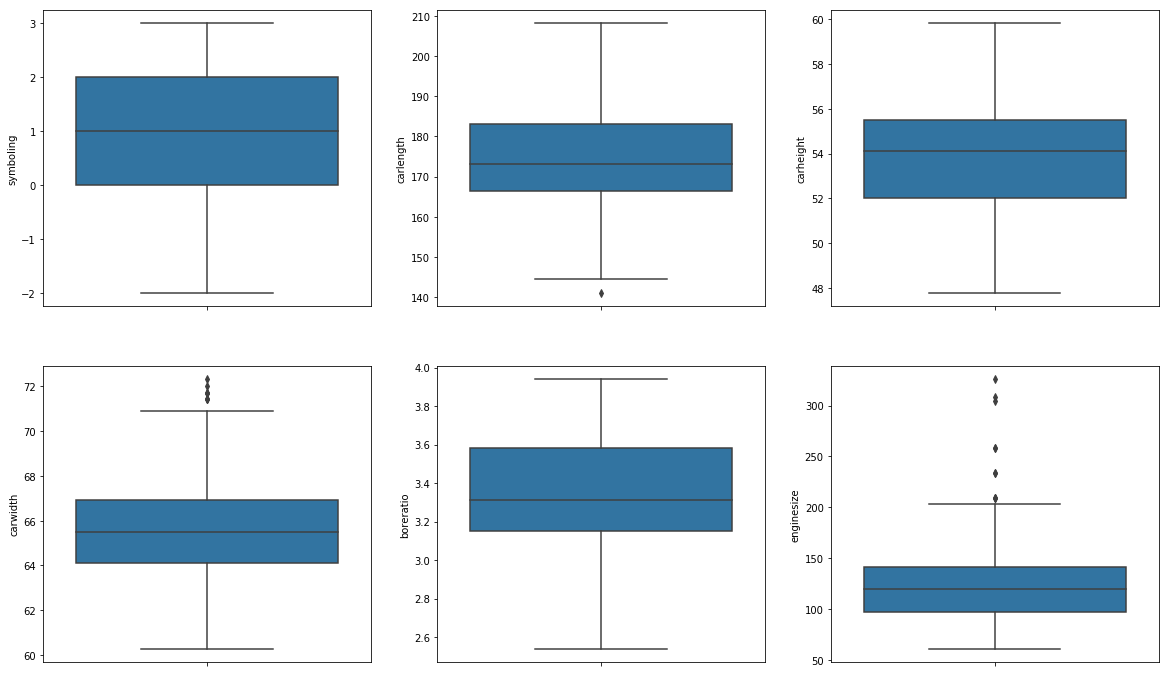

In [24]:
#Lets consider  numeric  variables  for data  issues
#get the boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot( y=df['symboling'])
plt.subplot(2,3,2)
sns.boxplot(y=df['carlength'])
plt.subplot(2,3,3)
sns.boxplot(y=df['carheight'])
plt.subplot(2,3,4)
sns.boxplot(y=df['carwidth'])
plt.subplot(2,3,5)
sns.boxplot(y=df['boreratio'])
plt.subplot(2,3,6)
sns.boxplot(y=df['enginesize'])
plt.show()


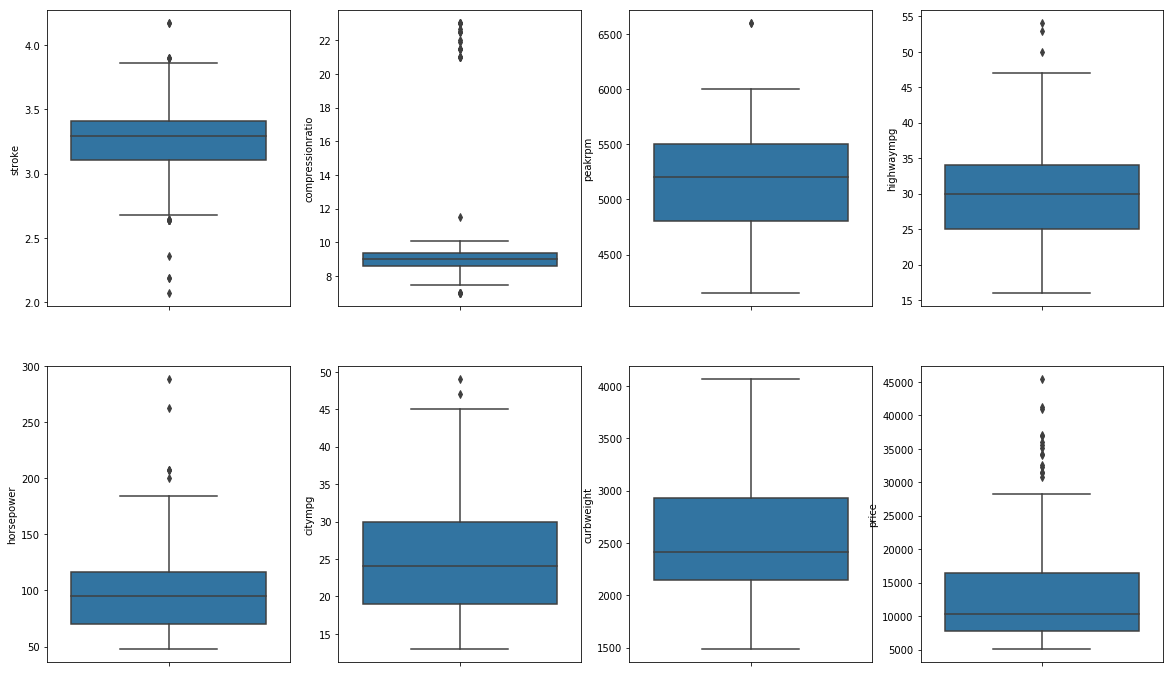

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot( y=df['stroke'])
plt.subplot(2,4,2)
sns.boxplot(y=df['compressionratio'])
plt.subplot(2,4,3)
sns.boxplot(y=df['peakrpm'])
plt.subplot(2,4,4)
sns.boxplot(y=df['highwaympg'])
plt.subplot(2,4,5)
sns.boxplot(y=df['horsepower'])
plt.subplot(2,4,6)
sns.boxplot(y=df['citympg'])
plt.subplot(2,4,7)
sns.boxplot(y=df['curbweight'])
plt.subplot(2,4,8)
sns.boxplot(y=df['price'])

In [26]:
#lets find length  of outliers

print(len(df.loc[df['compressionratio']>11]))
print(len(df.loc[df['highwaympg']>47]))
print(len(df.loc[df['stroke']>3.85]))
print(len(df.loc[df['stroke']<2.6]))
print(len(df.loc[df['enginesize']>205]))
print(len(df.loc[df['horsepower']>185]))
print(len(df.loc[df['citympg']>45]))
print(len(df.loc[df['carwidth']>70.5]))

21
3
9
4
10
6
2
10


In [27]:
#lets remove the  outliers which are high in numbers
#you need to fix with the threshold
df.loc[df['compressionratio'] > 11, ['compressionratio']] = 11
df.loc[df['stroke'] > 3.85 , ['stroke']]= 3.85
df.loc[df['enginesize'] > 205, ['enginesize']] =205
df.loc[df['horsepower'] > 185, ['horsepower']] = 185
df.loc[df['carwidth'] > 70.5, ['carwidth']] = 70.5

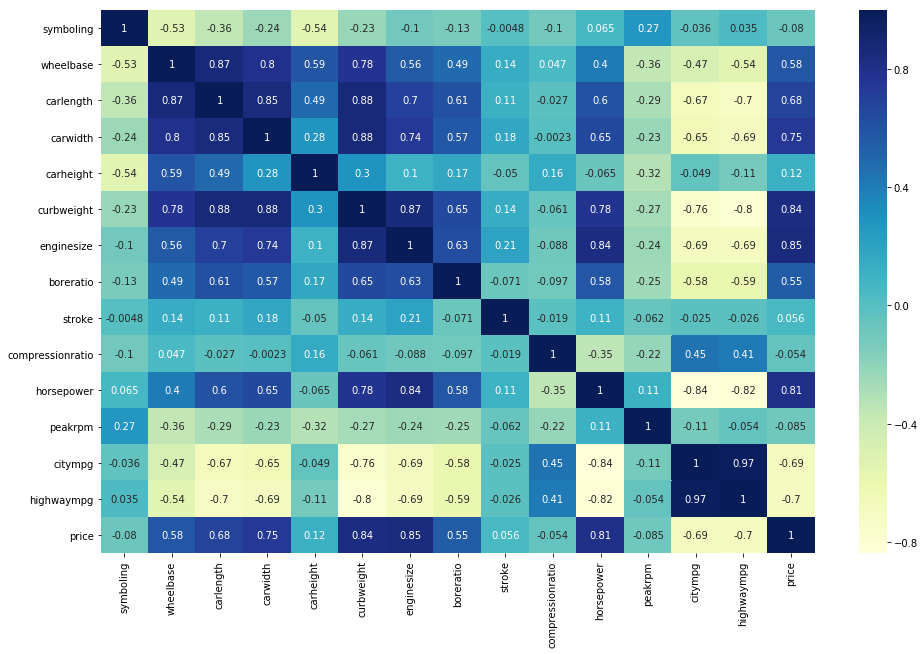

In [28]:
#lets get the correlation matrics
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [29]:
#lets drop  citympg,wheelbase, curbweight

#citympg  and highwaympg  are highly correlated to each othe 0.97 hence keep one of them  which 
#is having high correlation with price -0.7
#similarly wheelbase and car length  keep carlength with 0.68 correlaton with price
#similar to curbweight  is also highly  correlated to all remove it
df.drop(['citympg', 'wheelbase', 'curbweight'], axis=1, inplace=True) 
df.head()

symboling CarName fueltype aspiration doornumber      carbody drivewheel  \
0          3    alfa      gas        std        two  convertible        rwd   
1          3    alfa      gas        std        two  convertible        rwd   
2          1    alfa      gas        std        two    hatchback        rwd   
3          2    audi      gas        std       four        sedan        fwd   
4          2    audi      gas        std       four        sedan        4wd   

  enginelocation  carlength  carwidth   ...     cylindernumber enginesize  \
0          front      168.8      64.1   ...               four        130   
1          front      168.8      64.1   ...               four        130   
2          front      171.2      65.5   ...                six        152   
3          front      176.6      66.2   ...               four        109   
4          front      176.6      66.4   ...               five        136   

  fuelsystem  boreratio stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47   2.68               9.0         111     5000   
1       mpfi       3.47   2.68               9.0         111     5000   
2       mpfi       2.68   3.47               9.0         154     5000   
3       mpfi       3.19   3.40              10.0         102     5500   
4       mpfi       3.19   3.40               8.0         115     5500   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 22 columns]

In [30]:
#let us do  categorical  division
#Categorical
#'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation'
#'enginetype', 'cylindernumber','fuelsystem
carname_cat= pd.get_dummies(df['CarName'], drop_first = True)
carname_cat.columns

Index(['alfa', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [31]:
df = pd.concat([df, carname_cat], axis = 1)
df.head()

symboling CarName fueltype aspiration doornumber      carbody drivewheel  \
0          3    alfa      gas        std        two  convertible        rwd   
1          3    alfa      gas        std        two  convertible        rwd   
2          1    alfa      gas        std        two    hatchback        rwd   
3          2    audi      gas        std       four        sedan        fwd   
4          2    audi      gas        std       four        sedan        4wd   

  enginelocation  carlength  carwidth  ...    mitsubishi peugeot plymouth  \
0          front      168.8      64.1  ...             0       0        0   
1          front      168.8      64.1  ...             0       0        0   
2          front      171.2      65.5  ...             0       0        0   
3          front      176.6      66.2  ...             0       0        0   
4          front      176.6      66.4  ...             0       0        0   

   porsche renault  saab  subaru  toyota  volkswagen  volvo  
0        0       0     0       0       0           0      0  
1        0       0     0       0       0           0      0  
2        0       0     0       0       0           0      0  
3        0       0     0       0       0           0      0  
4        0       0     0       0       0           0      0  

[5 rows x 43 columns]

In [32]:
df.drop(['CarName'], axis = 1, inplace = True)
df.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  carlength  carwidth  carheight  ...   mitsubishi peugeot  \
0          front      168.8      64.1       48.8  ...            0       0   
1          front      168.8      64.1       48.8  ...            0       0   
2          front      171.2      65.5       52.4  ...            0       0   
3          front      176.6      66.2       54.3  ...            0       0   
4          front      176.6      66.4       54.3  ...            0       0   

   plymouth porsche  renault  saab  subaru  toyota  volkswagen  volvo  
0         0       0        0     0       0       0           0      0  
1         0       0        0     0       0       0           0      0  
2         0       0        0     0       0       0           0      0  
3         0       0        0     0       0       0           0      0  
4         0       0        0     0       0       0           0      0  

[5 rows x 42 columns]

In [33]:
def fuel_map(x):
    if x == 'gas':
        return 1
    if x == 'diesel':
         return 0
        
df['fueltype'] = df['fueltype'].apply(fuel_map)
df.head()

symboling  fueltype aspiration doornumber      carbody drivewheel  \
0          3         1        std        two  convertible        rwd   
1          3         1        std        two  convertible        rwd   
2          1         1        std        two    hatchback        rwd   
3          2         1        std       four        sedan        fwd   
4          2         1        std       four        sedan        4wd   

  enginelocation  carlength  carwidth  carheight  ...   mitsubishi peugeot  \
0          front      168.8      64.1       48.8  ...            0       0   
1          front      168.8      64.1       48.8  ...            0       0   
2          front      171.2      65.5       52.4  ...            0       0   
3          front      176.6      66.2       54.3  ...            0       0   
4          front      176.6      66.4       54.3  ...            0       0   

   plymouth porsche  renault  saab  subaru  toyota  volkswagen  volvo  
0         0       0        0     0       0       0           0      0  
1         0       0        0     0       0       0           0      0  
2         0       0        0     0       0       0           0      0  
3         0       0        0     0       0       0           0      0  
4         0       0        0     0       0       0           0      0  

[5 rows x 42 columns]

In [34]:
np.unique(df['fueltype'].values)

array([0, 1], dtype=int64)

In [35]:
def aspiration_map(x):
    if x == 'std':
        return 1
    if x == 'turbo':
         return 0
        
df['aspiration'] = df['aspiration'].apply(aspiration_map)
df.head()

symboling  fueltype  aspiration doornumber      carbody drivewheel  \
0          3         1           1        two  convertible        rwd   
1          3         1           1        two  convertible        rwd   
2          1         1           1        two    hatchback        rwd   
3          2         1           1       four        sedan        fwd   
4          2         1           1       four        sedan        4wd   

  enginelocation  carlength  carwidth  carheight  ...   mitsubishi peugeot  \
0          front      168.8      64.1       48.8  ...            0       0   
1          front      168.8      64.1       48.8  ...            0       0   
2          front      171.2      65.5       52.4  ...            0       0   
3          front      176.6      66.2       54.3  ...            0       0   
4          front      176.6      66.4       54.3  ...            0       0   

   plymouth porsche  renault  saab  subaru  toyota  volkswagen  volvo  
0         0       0        0     0       0       0           0      0  
1         0       0        0     0       0       0           0      0  
2         0       0        0     0       0       0           0      0  
3         0       0        0     0       0       0           0      0  
4         0       0        0     0       0       0           0      0  

[5 rows x 42 columns]

In [36]:
np.unique(df['aspiration'].values)

array([0, 1], dtype=int64)

In [37]:
def door_map(x):
    if x == 'two':
        return 1
    if x == 'four':
         return 0
        
df['doornumber'] = df['doornumber'].apply(door_map)
df.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0          3         1           1           1  convertible        rwd   
1          3         1           1           1  convertible        rwd   
2          1         1           1           1    hatchback        rwd   
3          2         1           1           0        sedan        fwd   
4          2         1           1           0        sedan        4wd   

  enginelocation  carlength  carwidth  carheight  ...   mitsubishi peugeot  \
0          front      168.8      64.1       48.8  ...            0       0   
1          front      168.8      64.1       48.8  ...            0       0   
2          front      171.2      65.5       52.4  ...            0       0   
3          front      176.6      66.2       54.3  ...            0       0   
4          front      176.6      66.4       54.3  ...            0       0   

   plymouth porsche  renault  saab  subaru  toyota  volkswagen  volvo  
0         0       0        0     0       0       0           0      0  
1         0       0        0     0       0       0           0      0  
2         0       0        0     0       0       0           0      0  
3         0       0        0     0       0       0           0      0  
4         0       0        0     0       0       0           0      0  

[5 rows x 42 columns]

In [38]:
#use  dummy  for carbody
cbody_cat = pd.get_dummies(df['carbody'], drop_first = True)
df= pd.concat([df, cbody_cat], axis = 1)
df.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0          3         1           1           1  convertible        rwd   
1          3         1           1           1  convertible        rwd   
2          1         1           1           1    hatchback        rwd   
3          2         1           1           0        sedan        fwd   
4          2         1           1           0        sedan        4wd   

  enginelocation  carlength  carwidth  carheight  ...   renault saab  subaru  \
0          front      168.8      64.1       48.8  ...         0    0       0   
1          front      168.8      64.1       48.8  ...         0    0       0   
2          front      171.2      65.5       52.4  ...         0    0       0   
3          front      176.6      66.2       54.3  ...         0    0       0   
4          front      176.6      66.4       54.3  ...         0    0       0   

  toyota  volkswagen  volvo  hardtop  hatchback  sedan  wagon  
0      0           0      0        0          0      0      0  
1      0           0      0        0          0      0      0  
2      0           0      0        0          1      0      0  
3      0           0      0        0          0      1      0  
4      0           0      0        0          0      1      0  

[5 rows x 46 columns]

In [39]:
df.drop(['carbody'], axis = 1, inplace = True)
df.head()

symboling  fueltype  aspiration  doornumber drivewheel enginelocation  \
0          3         1           1           1        rwd          front   
1          3         1           1           1        rwd          front   
2          1         1           1           1        rwd          front   
3          2         1           1           0        fwd          front   
4          2         1           1           0        4wd          front   

   carlength  carwidth  carheight enginetype  ...   renault  saab subaru  \
0      168.8      64.1       48.8       dohc  ...         0     0      0   
1      168.8      64.1       48.8       dohc  ...         0     0      0   
2      171.2      65.5       52.4        ohc  ...         0     0      0   
3      176.6      66.2       54.3        ohc  ...         0     0      0   
4      176.6      66.4       54.3        ohc  ...         0     0      0   

   toyota  volkswagen  volvo  hardtop  hatchback  sedan  wagon  
0       0           0      0        0          0      0      0  
1       0           0      0        0          0      0      0  
2       0           0      0        0          1      0      0  
3       0           0      0        0          0      1      0  
4       0           0      0        0          0      1      0  

[5 rows x 45 columns]

In [40]:
drivewheel_cat = pd.get_dummies(df['drivewheel'], drop_first = True)
df= pd.concat([df, drivewheel_cat], axis = 1)
df.head()

symboling  fueltype  aspiration  doornumber drivewheel enginelocation  \
0          3         1           1           1        rwd          front   
1          3         1           1           1        rwd          front   
2          1         1           1           1        rwd          front   
3          2         1           1           0        fwd          front   
4          2         1           1           0        4wd          front   

   carlength  carwidth  carheight enginetype ...  subaru  toyota volkswagen  \
0      168.8      64.1       48.8       dohc ...       0       0          0   
1      168.8      64.1       48.8       dohc ...       0       0          0   
2      171.2      65.5       52.4        ohc ...       0       0          0   
3      176.6      66.2       54.3        ohc ...       0       0          0   
4      176.6      66.4       54.3        ohc ...       0       0          0   

   volvo  hardtop  hatchback  sedan  wagon  fwd  rwd  
0      0        0          0      0      0    0    1  
1      0        0          0      0      0    0    1  
2      0        0          1      0      0    0    1  
3      0        0          0      1      0    1    0  
4      0        0          0      1      0    0    0  

[5 rows x 47 columns]

In [41]:
df.drop(['drivewheel'], axis = 1, inplace = True)
df.head()

symboling  fueltype  aspiration  doornumber enginelocation  carlength  \
0          3         1           1           1          front      168.8   
1          3         1           1           1          front      168.8   
2          1         1           1           1          front      171.2   
3          2         1           1           0          front      176.6   
4          2         1           1           0          front      176.6   

   carwidth  carheight enginetype cylindernumber ...   subaru toyota  \
0      64.1       48.8       dohc           four ...        0      0   
1      64.1       48.8       dohc           four ...        0      0   
2      65.5       52.4        ohc            six ...        0      0   
3      66.2       54.3        ohc           four ...        0      0   
4      66.4       54.3        ohc           five ...        0      0   

   volkswagen  volvo  hardtop  hatchback  sedan  wagon  fwd  rwd  
0           0      0        0          0      0      0    0    1  
1           0      0        0          0      0      0    0    1  
2           0      0        0          1      0      0    0    1  
3           0      0        0          0      1      0    1    0  
4           0      0        0          0      1      0    0    0  

[5 rows x 46 columns]

In [42]:
def eloc_map(x):
    if x == 'front':
        return 1
    if x == 'rear':
         return 0
df['enginelocation'] = df['enginelocation'].apply(eloc_map)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carwidth  carheight enginetype cylindernumber ...   subaru toyota  \
0      64.1       48.8       dohc           four ...        0      0   
1      64.1       48.8       dohc           four ...        0      0   
2      65.5       52.4        ohc            six ...        0      0   
3      66.2       54.3        ohc           four ...        0      0   
4      66.4       54.3        ohc           five ...        0      0   

   volkswagen  volvo  hardtop  hatchback  sedan  wagon  fwd  rwd  
0           0      0        0          0      0      0    0    1  
1           0      0        0          0      0      0    0    1  
2           0      0        0          1      0      0    0    1  
3           0      0        0          0      1      0    1    0  
4           0      0        0          0      1      0    0    0  

[5 rows x 46 columns]

In [43]:
#use  dummy  for carbody
#enginetype', 'cylindernumber','fuelsystem
cnum_cat = pd.get_dummies(df['cylindernumber'], drop_first = True)
df= pd.concat([df, cnum_cat], axis = 1)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carwidth  carheight enginetype cylindernumber ...   sedan wagon  fwd  rwd  \
0      64.1       48.8       dohc           four ...       0     0    0    1   
1      64.1       48.8       dohc           four ...       0     0    0    1   
2      65.5       52.4        ohc            six ...       0     0    0    1   
3      66.2       54.3        ohc           four ...       1     0    1    0   
4      66.4       54.3        ohc           five ...       1     0    0    0   

   five  four  six  three  twelve  two  
0     0     1    0      0       0    0  
1     0     1    0      0       0    0  
2     0     0    1      0       0    0  
3     0     1    0      0       0    0  
4     1     0    0      0       0    0  

[5 rows x 52 columns]

In [44]:
df.drop(['cylindernumber'], axis = 1, inplace = True)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carwidth  carheight enginetype  enginesize ...  sedan  wagon  fwd  rwd  \
0      64.1       48.8       dohc         130 ...      0      0    0    1   
1      64.1       48.8       dohc         130 ...      0      0    0    1   
2      65.5       52.4        ohc         152 ...      0      0    0    1   
3      66.2       54.3        ohc         109 ...      1      0    1    0   
4      66.4       54.3        ohc         136 ...      1      0    0    0   

   five  four  six  three  twelve  two  
0     0     1    0      0       0    0  
1     0     1    0      0       0    0  
2     0     0    1      0       0    0  
3     0     1    0      0       0    0  
4     1     0    0      0       0    0  

[5 rows x 51 columns]

In [45]:
etype = pd.get_dummies(df['enginetype'], drop_first = True)
df= pd.concat([df, etype], axis = 1)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carwidth  carheight enginetype  enginesize  ...   rwd  five  four  six  \
0      64.1       48.8       dohc         130  ...     1     0     1    0   
1      64.1       48.8       dohc         130  ...     1     0     1    0   
2      65.5       52.4        ohc         152  ...     1     0     0    1   
3      66.2       54.3        ohc         109  ...     0     0     1    0   
4      66.4       54.3        ohc         136  ...     0     1     0    0   

   three  twelve  two  l  ohc  rotor  
0      0       0    0  0    0      0  
1      0       0    0  0    0      0  
2      0       0    0  0    1      0  
3      0       0    0  0    1      0  
4      0       0    0  0    1      0  

[5 rows x 54 columns]

In [46]:
df.drop(['enginetype'], axis = 1, inplace = True)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carwidth  carheight  enginesize fuelsystem  ...    rwd  five  four  six  \
0      64.1       48.8         130       mpfi  ...      1     0     1    0   
1      64.1       48.8         130       mpfi  ...      1     0     1    0   
2      65.5       52.4         152       mpfi  ...      1     0     0    1   
3      66.2       54.3         109       mpfi  ...      0     0     1    0   
4      66.4       54.3         136       mpfi  ...      0     1     0    0   

   three  twelve  two  l  ohc  rotor  
0      0       0    0  0    0      0  
1      0       0    0  0    0      0  
2      0       0    0  0    1      0  
3      0       0    0  0    1      0  
4      0       0    0  0    1      0  

[5 rows x 53 columns]

In [47]:
ftype = pd.get_dummies(df['fuelsystem'], drop_first = True)
df= pd.concat([df, ftype], axis = 1)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carwidth  carheight  enginesize fuelsystem  ...   l  ohc  rotor  2bbl  \
0      64.1       48.8         130       mpfi  ...   0    0      0     0   
1      64.1       48.8         130       mpfi  ...   0    0      0     0   
2      65.5       52.4         152       mpfi  ...   0    1      0     0   
3      66.2       54.3         109       mpfi  ...   0    1      0     0   
4      66.4       54.3         136       mpfi  ...   0    1      0     0   

   4bbl  idi  mfi  mpfi  spdi  spfi  
0     0    0    0     1     0     0  
1     0    0    0     1     0     0  
2     0    0    0     1     0     0  
3     0    0    0     1     0     0  
4     0    0    0     1     0     0  

[5 rows x 60 columns]

In [48]:
df.drop(['fuelsystem'], axis = 1, inplace = True)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carwidth  carheight  enginesize  boreratio  ...   l  ohc  rotor  2bbl  \
0      64.1       48.8         130       3.47  ...   0    0      0     0   
1      64.1       48.8         130       3.47  ...   0    0      0     0   
2      65.5       52.4         152       2.68  ...   0    1      0     0   
3      66.2       54.3         109       3.19  ...   0    1      0     0   
4      66.4       54.3         136       3.19  ...   0    1      0     0   

   4bbl  idi  mfi  mpfi  spdi  spfi  
0     0    0    0     1     0     0  
1     0    0    0     1     0     0  
2     0    0    0     1     0     0  
3     0    0    0     1     0     0  
4     0    0    0     1     0     0  

[5 rows x 59 columns]

In [49]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'price', 'alfa', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'five', 'four', 'six', 'three', 'twelve', 'two', 'l', 'ohc',
       'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
#'symboling', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize',
#'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'

num_vars = ['symboling', 'carlength', 'carwidth', 'carheight' ,'enginesize','boreratio', 'stroke', 
            'compressionratio','horsepower', 
            'peakrpm', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
122        0.6         1           1           0               1   0.426016   
125        1.0         1           1           1               1   0.452033   
166        0.6         1           1           1               1   0.448780   
1          1.0         1           1           1               1   0.450407   
199        0.2         1           0           0               1   0.775610   

     carwidth  carheight  enginesize  boreratio  ...   l  ohc  rotor  2bbl  \
122  0.343137   0.265487    0.256944   0.230159  ...   0    1      0     1   
125  0.784314   0.212389    0.625000   1.000000  ...   0    1      0     0   
166  0.362745   0.424779    0.256944   0.444444  ...   0    0      0     0   
1    0.372549   0.088496    0.479167   0.626984  ...   0    0      0     0   
199  0.676471   0.858407    0.479167   0.746032  ...   0    1      0     0   

     4bbl  idi  mfi  mpfi  spdi  spfi  
122     0    0    0     0     0     0  
125     0    0    0     1     0     0  
166     0    0    0     1     0     0  
1       0    0    0     1     0     0  
199     0    0    0     1     0     0  

[5 rows x 59 columns]

In [55]:
df_train.describe()

symboling    fueltype  aspiration  doornumber  enginelocation  \
count  143.000000  143.000000  143.000000  143.000000      143.000000   
mean     0.559441    0.909091    0.818182    0.440559        0.993007   
std      0.239200    0.288490    0.387050    0.498199        0.083624   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.400000    1.000000    1.000000    0.000000        1.000000   
50%      0.600000    1.000000    1.000000    0.000000        1.000000   
75%      0.600000    1.000000    1.000000    1.000000        1.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

        carlength    carwidth   carheight  enginesize   boreratio  ...    \
count  143.000000  143.000000  143.000000  143.000000  143.000000  ...     
mean     0.525476    0.538667    0.509004    0.429924    0.497946  ...     
std      0.204848    0.206076    0.215378    0.239517    0.207140  ...     
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...     
25%      0.399187    0.357843    0.353982    0.250000    0.305556  ...     
50%      0.502439    0.500000    0.522124    0.340278    0.500000  ...     
75%      0.669919    0.647059    0.668142    0.555556    0.682540  ...     
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...     

                l         ohc       rotor        2bbl        4bbl         idi  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.062937    0.832168    0.027972    0.349650    0.020979    0.090909   
std      0.243703    0.375031    0.165472    0.478536    0.143818    0.288490   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mfi        mpfi        spdi   spfi  
count  143.0  143.000000  143.000000  143.0  
mean     0.0    0.440559    0.041958    0.0  
std      0.0    0.498199    0.201198    0.0  
min      0.0    0.000000    0.000000    0.0  
25%      0.0    0.000000    0.000000    0.0  
50%      0.0    0.000000    0.000000    0.0  
75%      0.0    1.000000    0.000000    0.0  
max      0.0    1.000000    1.000000    0.0  

[8 rows x 59 columns]

In [56]:
y_train = df_train.pop('price')
X_train = df_train

In [57]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 25),
 ('fueltype', False, 33),
 ('aspiration', False, 12),
 ('doornumber', False, 40),
 ('enginelocation', True, 1),
 ('carlength', False, 47),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 22),
 ('horsepower', False, 30),
 ('peakrpm', False, 14),
 ('highwaympg', False, 38),
 ('alfa', False, 29),
 ('audi', False, 4),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 32),
 ('dodge', False, 15),
 ('honda', False, 19),
 ('isuzu', False, 42),
 ('jaguar', True, 1),
 ('mazda', False, 37),
 ('mercury', False, 45),
 ('mitsubishi', False, 13),
 ('peugeot', False, 7),
 ('plymouth', False, 16),
 ('porsche', True, 1),
 ('renault', False, 20),
 ('saab', False, 10),
 ('subaru', False, 18),
 ('toyota', False, 46),
 ('volkswagen', False, 44),
 ('volvo', False, 9),
 ('hardtop', False, 27),
 ('hatchback', False, 24),
 ('sedan', False, 26),
 ('wagon', False, 28),
 

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'enginesize', 'boreratio', 'bmw', 'buick',
       'jaguar', 'porsche', 'three', 'rotor'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'highwaympg', 'alfa', 'audi', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'five', 'four', 'six',
       'twelve', 'two', 'l', 'ohc', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [64]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [65]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.18e-64
Time:                        23:31:28   Log-Likelihood:                 190.90
No. Observations:                 143   AIC:                            -359.8
Df Residuals:                     132   BIC:                            -327.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1772      0.085      2.

In [66]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1        carwidth  28.68
2      enginesize  19.47
3       boreratio  12.37
0  enginelocation  11.93
5           buick   1.44
7         porsche   1.34
4             bmw   1.31
6          jaguar   1.31
9           rotor   1.28
8           three   1.08

In [68]:
#engine size high vif
X_train_new = X_train_new.drop(['enginesize'], axis=1)

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new2 = sm.add_constant(X_train_new)

In [70]:
lm = sm.OLS(y_train,X_train_new2).fit() 

In [71]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.70e-58
Time:                        23:32:02   Log-Likelihood:                 170.92
No. Observations:                 143   AIC:                            -321.8
Df Residuals:                     133   BIC:                            -292.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3114      0.094      3.

In [72]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1        carwidth  17.16
0  enginelocation  11.81
2       boreratio  11.52
4           buick   1.36
6         porsche   1.27
5          jaguar   1.17
3             bmw   1.08
7           three   1.08
8           rotor   1.03

In [73]:
X_train_new = X_train_new.drop(['rotor'], axis=1)#high p value

In [74]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new3 = sm.add_constant(X_train_new)

In [75]:
lm = sm.OLS(y_train,X_train_new3).fit() 

In [76]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.74e-58
Time:                        23:32:23   Log-Likelihood:                 170.12
No. Observations:                 143   AIC:                            -322.2
Df Residuals:                     134   BIC:                            -295.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3124      0.094      3.

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1        carwidth  17.16
0  enginelocation  11.81
2       boreratio  11.51
4           buick   1.36
6         porsche   1.27
5          jaguar   1.17
3             bmw   1.08
7           three   1.08

In [78]:
X_train_new = X_train_new.drop(['enginelocation'], axis=1)# high vif

In [79]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new4 = sm.add_constant(X_train_new)

In [80]:
lm = sm.OLS(y_train,X_train_new4).fit() 

In [81]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.53e-54
Time:                        23:32:43   Log-Likelihood:                 157.77
No. Observations:                 143   AIC:                            -299.5
Df Residuals:                     135   BIC:                            -275.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1479      0.024     -6.250      0.0

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   carwidth  10.84
1  boreratio  10.41
3      buick   1.19
5    porsche   1.10
4     jaguar   1.08
2        bmw   1.07
6      three   1.01

In [83]:
X_train_new = X_train_new.drop(['boreratio'], axis=1)#high p value

In [84]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new5 = sm.add_constant(X_train_new)

In [85]:
lm = sm.OLS(y_train,X_train_new5).fit() 

In [86]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.26e-55
Time:                        23:33:03   Log-Likelihood:                 157.74
No. Observations:                 143   AIC:                            -301.5
Df Residuals:                     136   BIC:                            -280.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1462      0.022     -6.559      0.0

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  carwidth  1.32
2     buick  1.14
3    jaguar  1.07
1       bmw  1.06
4   porsche  1.05
5     three  1.00

In [88]:
X_train_new = X_train_new.drop(['three'], axis=1)#high p value

In [89]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new6 = sm.add_constant(X_train_new)

In [90]:
lm = sm.OLS(y_train,X_train_new6).fit() 

In [91]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     164.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.03e-56
Time:                        23:33:29   Log-Likelihood:                 156.20
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     137   BIC:                            -282.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1362      0.022     -6.283      0.0

In [92]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  carwidth  1.32
2     buick  1.14
3    jaguar  1.07
1       bmw  1.06
4   porsche  1.05

In [93]:
X_train_new = X_train_new.drop(['buick'], axis=1)# high vif value

In [94]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new7 = sm.add_constant(X_train_new)

In [95]:
lm = sm.OLS(y_train,X_train_new7).fit() 

In [96]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     152.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.23e-49
Time:                        23:33:48   Log-Likelihood:                 137.84
No. Observations:                 143   AIC:                            -265.7
Df Residuals:                     138   BIC:                            -250.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1881      0.023     -8.277      0.0

In [97]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  carwidth  1.16
1       bmw  1.06
2    jaguar  1.06
3   porsche  1.04

In [98]:
#Residual  analysis of train data
y_train_price = lm.predict(X_train_new7)

Text(0.5,0,'Errors')

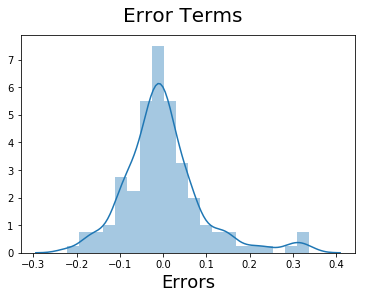

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [100]:
num_vars = ['symboling', 'carlength', 'carwidth', 'carheight' ,'enginesize','boreratio', 'stroke', 
            'compressionratio','horsepower', 
            'peakrpm', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [101]:
y_test = df_test.pop('price')
X_test = df_test

In [102]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [103]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

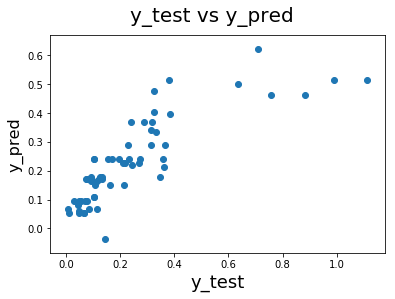

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [105]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6434133330456266